# Pset2.1

In [4]:
from __future__ import print_function, division
import time, os, json
import numpy as np
import matplotlib.pyplot as plt
import quasars as q
import fisher_scoring as fs

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [186]:
def add_intercept(X_):
    return np.insert(X_, [0], np.ones((X_.shape[0], 1)), axis=1)

def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

def calc_grad(X, Y, theta):
    m, n = X.shape
    grad = np.zeros(theta.shape)

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad

def logistic_regression(X_, Y_, learning_rate=10, iterations=100000, interval=1000, num_examples=100):
    X = X_[:num_examples]
    Y = Y_[:num_examples]
    m, n = X.shape
    theta = np.zeros(n)

    theta_diffs = []
    errors = []
    theta_norms = []
    thetas = []
    iters = []
    grads = []
    for i in range(iterations):
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta  - learning_rate * (grad)
        theta_diff = np.linalg.norm(prev_theta - theta)
        
        if i % interval == 0:
            # error calc
            h = X.dot(theta)
            false_pos = np.logical_and(h<0.5, Y==1)
            false_neg = np.logical_and(h>=0.5, Y==-1)
            error = (np.sum(false_pos) + np.sum(false_neg))* (1./m)
            errors.append([i, error])
            
            #print('Finished %d iterations' % i)
            theta_diffs.append([i, theta_diff])
            theta_norms.append([i, np.linalg.norm(theta)])
            thetas.append(theta)
            grads.append(grad)
            iters.append(i)
        if theta_diff < 1e-15:
            print('Converged in %d iterations' % i)
            break
            
    return theta, thetas, theta_diffs, errors, theta_norms, iters, grads

### Load the data

In [6]:
Xa, Ya = load_data('data_a.txt')
Xb, Yb = load_data('data_b.txt')

In [7]:
print(Xa.shape)
print(Ya.shape)
print(Xb.shape)
print(Yb.shape)

(100, 3)
(100,)
(100, 3)
(100,)


### Let's take a look at the data

In [104]:
pos_Xa = Xa[Ya == 1]
neg_Xa = Xa[Ya == -1]
pos_Xb = Xb[Yb == 1]
neg_Xb = Xb[Yb == -1]

In [105]:
def plot_data(X, X_pos, Y_pos, X_neg, Y_neg, xlabel, ylabel, color_pos, color_neg, desc, theta=None):
    plt.figure()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.scatter(X_pos, Y_pos, c=color_pos)
    plt.scatter(X_neg, Y_neg, c=color_neg)
    
    if (theta is not None):
        X1 = X[:, 1]
        x1 = np.arange(min(X1), max(X1), 0.01)
        x2 = -(theta[0] / theta[2]) - (theta[1] / theta[2]) * x1;
        plt.plot(x1, x2, linewidth=2, c='r');
        plt.xlabel('x1');
        plt.ylabel('x2');

    plt.suptitle(desc)
    plt.show()

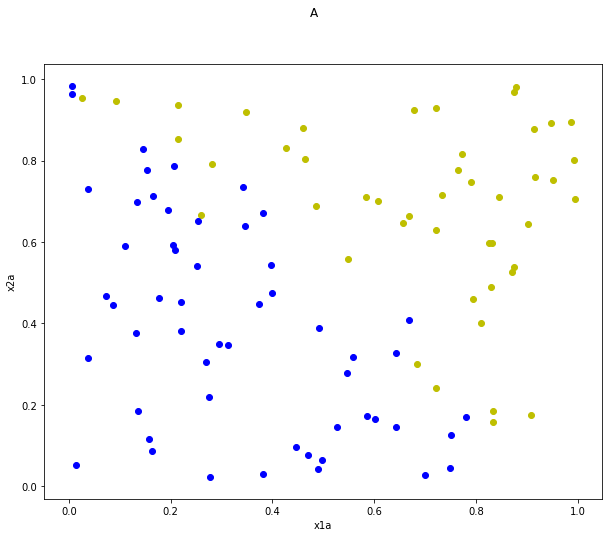

In [107]:
plot_data(Xa, pos_Xa[:, 1], pos_Xa[:, 2], neg_Xa[:, 1], neg_Xa[:, 2], 'x1a', 'x2a', 'y', 'b', 'A')

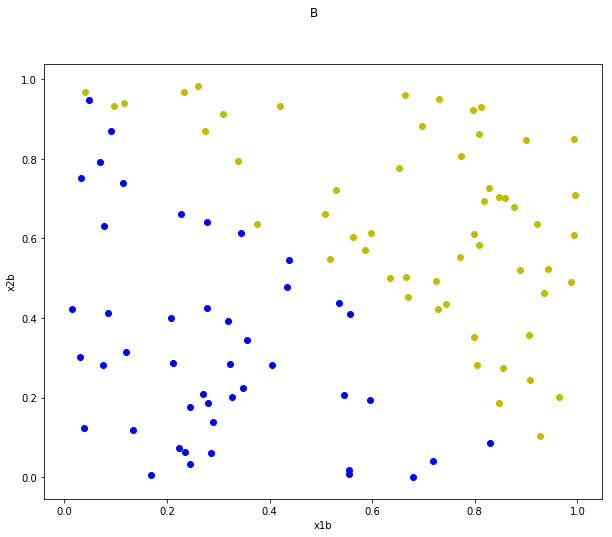

In [108]:
plot_data(Xb, pos_Xb[:, 1], pos_Xb[:, 2], neg_Xb[:, 1], neg_Xb[:, 2], 'x1b', 'x2b', 'y', 'b', 'B')

They don't look terribly different. B doesn't seem to have any negative data points in the positive area, but otherwise pretty similar visually.

## Run logistic Regression

In [165]:
theta_a, thetas_a, theta_diffs_a, errors_a, theta_norms_a, iters_a, grads_a = logistic_regression(Xa, Ya, interval=100)

Converged in 30371 iterations


In [187]:
theta_b, thetas_b, theta_diffs_b, errors_b, theta_norms_b, iters_b, grads_b = logistic_regression(Xb, Yb, interval=100)

Never converged with dataset B!!!

# 1 a
It appears that dataset B does not converge with logistic regression. Dataset A converges very quickly.

# 1 b
Let's take a look at the error rates, the thetas, and the theta growth rates to see if there is anything to be found there.

In [179]:
def plot(X, ylabel, desc, line=True):
    plt.figure()
    plt.ylabel(ylabel)
    plt.xlabel('Iteration')
    if (line):
        plt.axhline(y=0, color='r', linestyle='-')
    plt.scatter(X[:,0], X[:,1])
    plt.suptitle(desc)
    plt.show()
    
def plot_theta(iters, theta, ylabel, desc, color='r'):
    plt.figure()
    plt.ylabel(ylabel)
    plt.xlabel('Iteration')
    plt.plot(iters, theta, c=color)
    plt.suptitle(desc)
    plt.show()

### Set A

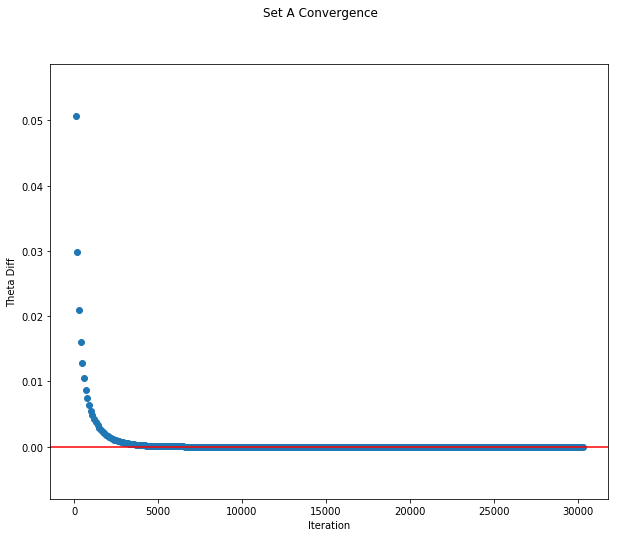

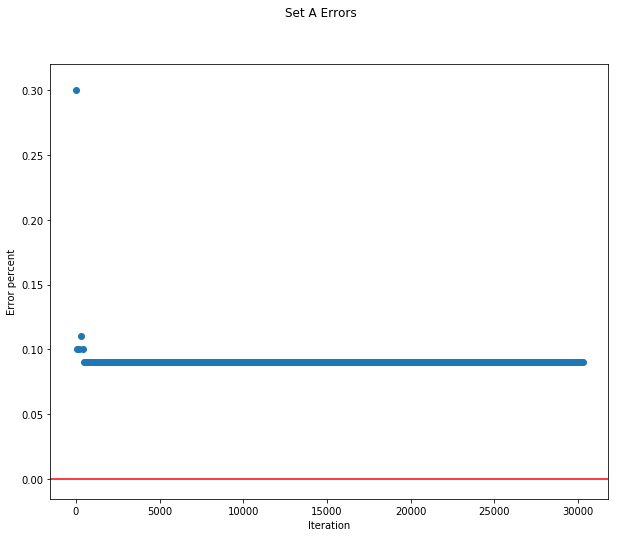

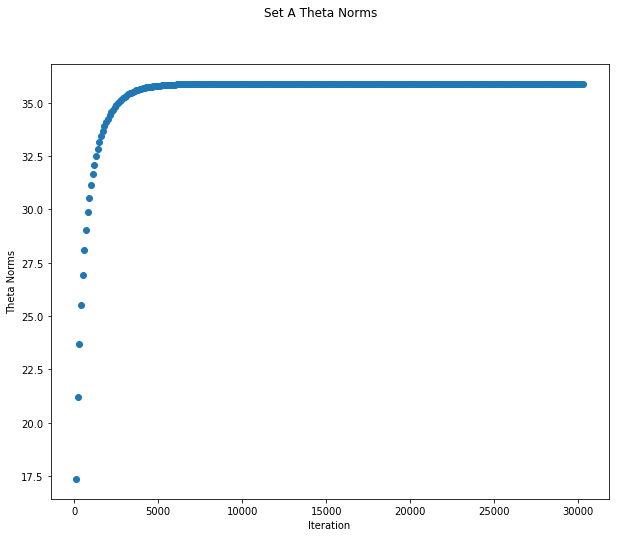

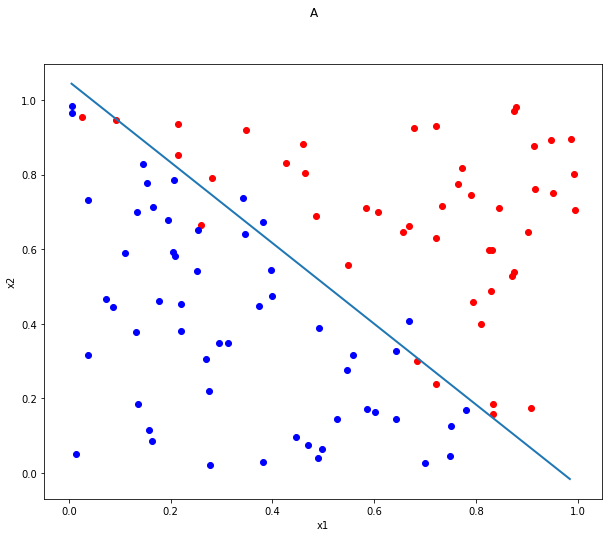

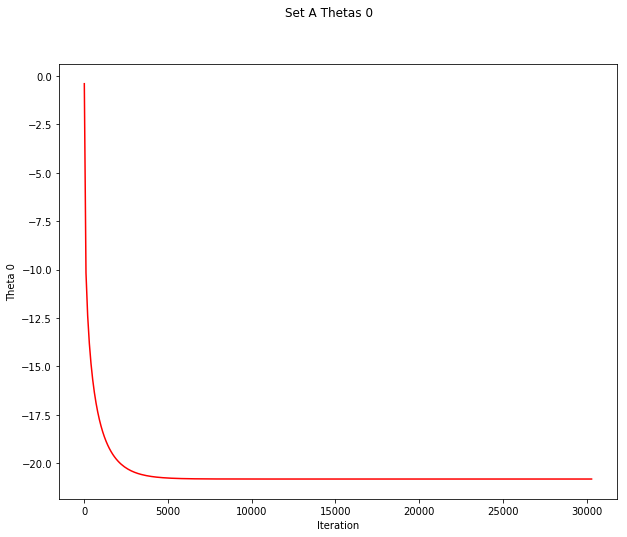

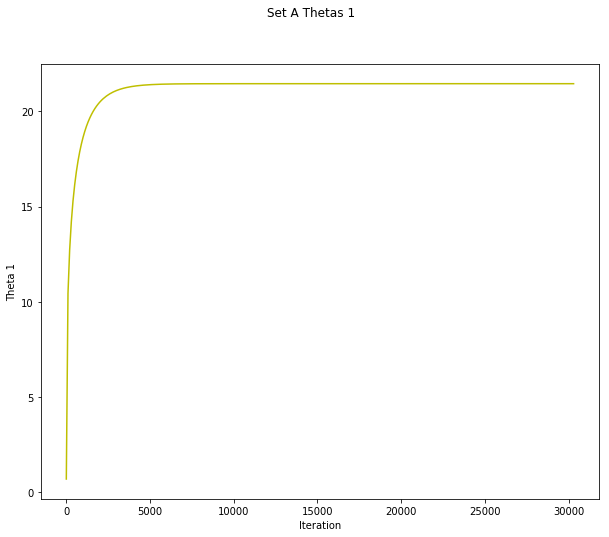

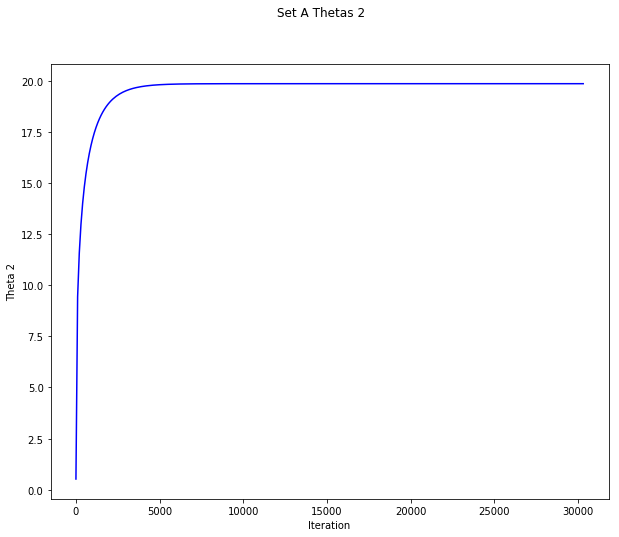

array([-20.81437788,  21.45295159,  19.85198176])

In [180]:
plot(np.asarray(theta_diffs_a)[1:], 'Theta Diff', 'Set A Convergence')
plot(np.asarray(errors_a), 'Error percent', 'Set A Errors')
plot(np.asarray(theta_norms_a)[1:], 'Theta Norms', 'Set A Theta Norms', line=False)
plot_data(Xa, pos_Xa[:, 1], pos_Xa[:, 2], neg_Xa[:, 1], neg_Xa[:, 2], 'x1a', 'x2a', 'r', 'b', 'A', theta=theta_a)

plot_theta(iters_a, np.asarray(thetas_a)[:, 0], 'Theta 0', 'Set A Thetas 0')
plot_theta(iters_a, np.asarray(thetas_a)[:, 1], 'Theta 1', 'Set A Thetas 1', color='y')
plot_theta(iters_a, np.asarray(thetas_a)[:, 2], 'Theta 2', 'Set A Thetas 2', color='b')

theta_a

### Set B

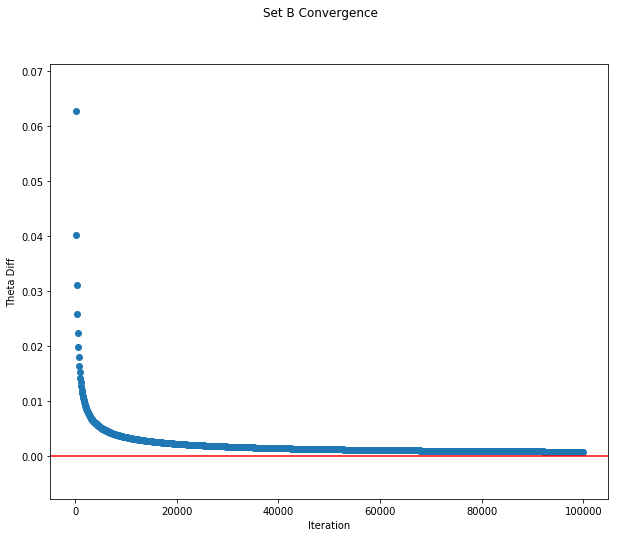

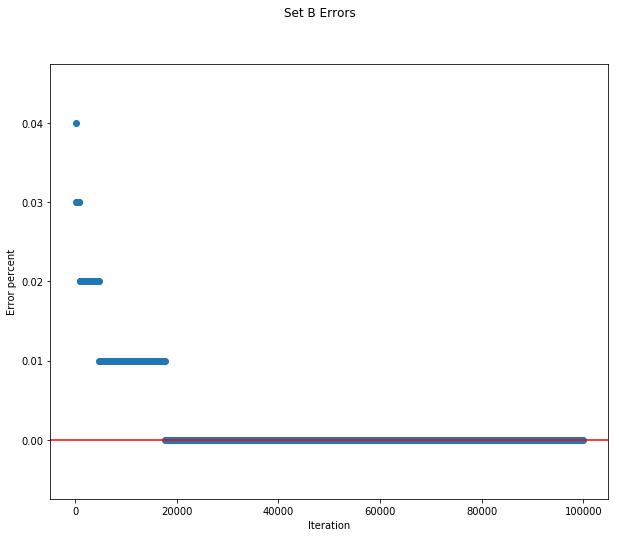

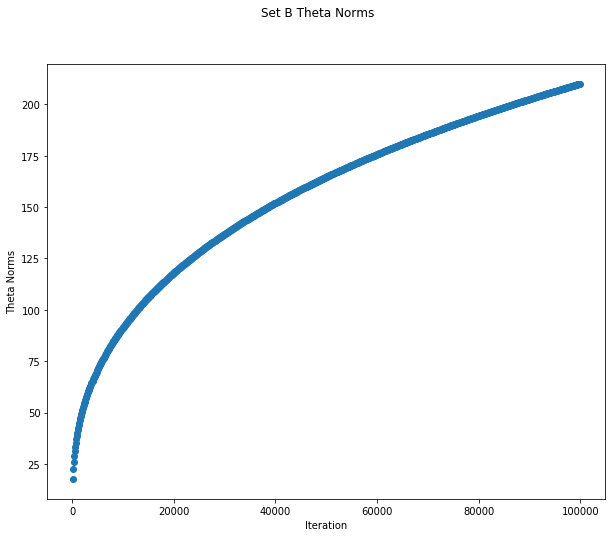

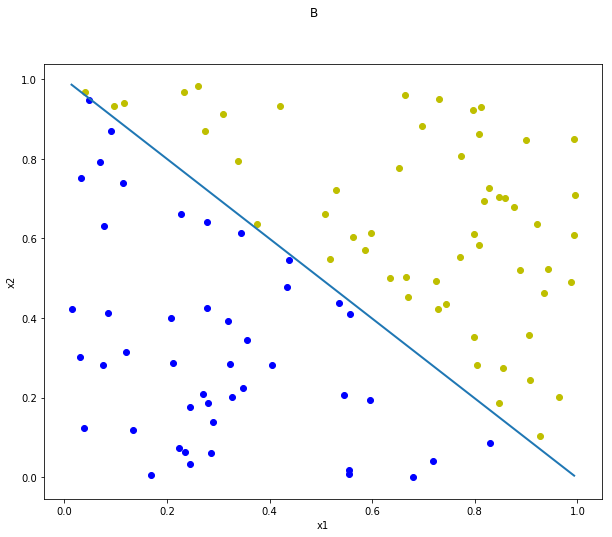

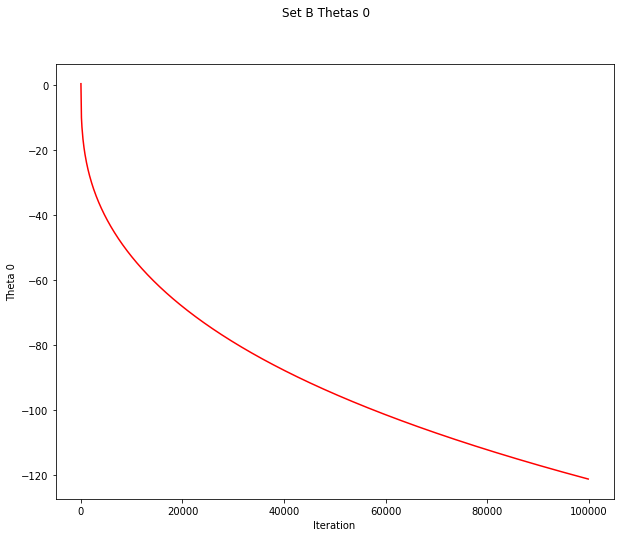

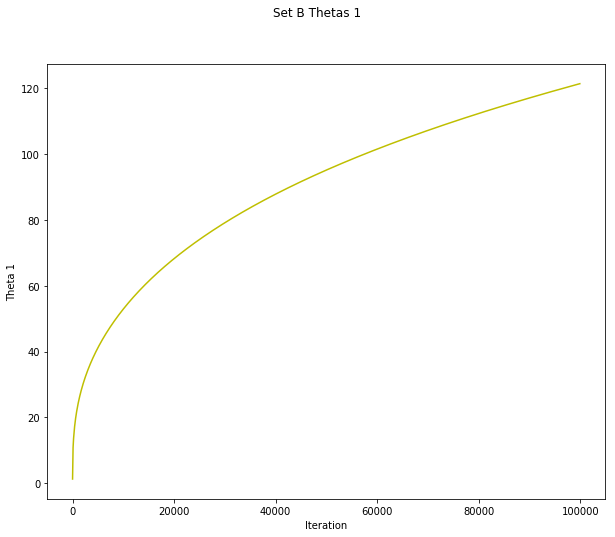

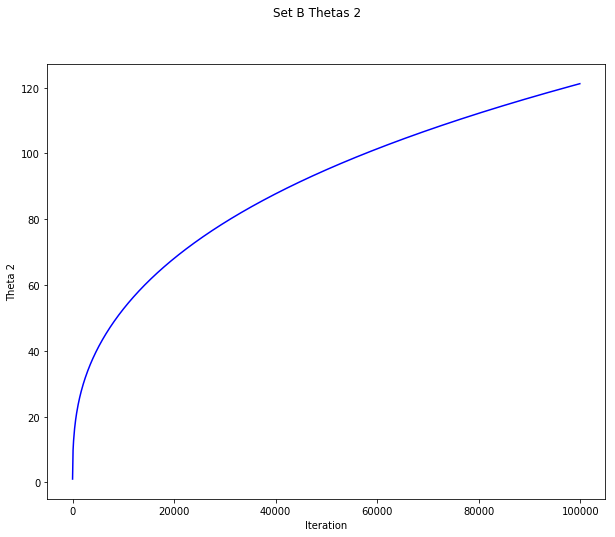

array([-121.21097234,  121.48709579,  121.24190606])

In [181]:
plot(np.asarray(theta_diffs_b)[1:], 'Theta Diff', 'Set B Convergence')
plot(np.asarray(errors_b)[1:], 'Error percent', 'Set B Errors')
plot(np.asarray(theta_norms_b)[1:], 'Theta Norms', 'Set B Theta Norms', line=False)
plot_data(Xb, pos_Xb[:, 1], pos_Xb[:, 2], neg_Xb[:, 1], neg_Xb[:, 2], 'x1b', 'x2b', 'y', 'b', 'B', theta=theta_b)

plot_theta(iters_b, np.asarray(thetas_b)[:, 0], 'Theta 0', 'Set B Thetas 0')
plot_theta(iters_b, np.asarray(thetas_b)[:, 1], 'Theta 1', 'Set B Thetas 1', color='y')
plot_theta(iters_b, np.asarray(thetas_b)[:, 2], 'Theta 2', 'Set B Thetas 2', color='b')

theta_b

In [182]:
print("xa", Xa[0])
print("xb", Xb[0])

margin_a = Ya[0] * np.dot(Xa[0], theta_a)
margin_b = Yb[0] * np.dot(Xb[0], theta_b)
print("margin a", margin_a)
print("margin b", margin_b)

probs_a = 1. / (1 + np.exp(margin_a))
probs_b = 1. / (1 + np.exp(margin_b))

print("Prob a", probs_a)
print("Prob b", probs_b)

grad_a = -(Xa[0].T.dot(probs_a * Ya[0]))
grad_b = -(Xb[0].T.dot(probs_b * Yb[0]))

print("grad a", grad_a)
print("grad b", grad_b)

xa [ 1.          0.60126603  0.16509106]
xb [ 1.          0.59566305  0.19307214]
margin a 4.63806211082
margin b 25.4371644046
Prob a 0.00958369535146
Prob b 8.96974018978e-12
grad a [ 0.0095837   0.00576235  0.00158218]
grad b [  8.96974019e-12   5.34294280e-12   1.73180691e-12]


The norm for theta for dataset B is growing unboundedly. The error rate is 0% for B and about 8% for A, which means that the data is perfectly separable in dataset B but not in A.

When we take a look at the values for the gradients, we can see that the gradient for B is very close to zero, which means that there isn't anywhere for the gradient descent function to go. The gradient descent function doesn't converge because the thetas are continuing to grow, which makes a large delta from each previous theta.

In a normal case, there are a few misclassified points because the data isn't perfectly separable. The gradient is defined as $$\frac{\partial l}{\partial \theta_j} = (y^{(i)} - h_{\theta}(x^{(i)}))x_j$$ for logistic regression. If $y^{(i)} \approx h_{\theta}(x^{(i)})$ for every $i$ except for a few points, then the gradient will be high for those few points. However, when the gradient descent function tries to step in that direction, another gradient for a point on the other side of the line will pull the gradient back, creating a minimum for theta to settle into after a reasonable number of iterations. But what happens when there are no misclassified points to create that minimum? The gradient descent function, trying to get $y - h_{\theta}(x^{(i)}) = 0$, will keep increasing $\theta$ so that $h_{\theta}(x^{(i)})$ is as close to 1 as possible. However, since $h_{\theta}(x^{(i)})$ is the logistic or sigmoid function, reaching 1 is not possible because the sigmoid function asymptotically approaches 1, so the logistic regression gradient descent function will never converge.

# 1 c
## i
A different learning rate will not help because the problem of theta going to infinity is not affected by the learning rate (theta would only go to infinity slower or faster, but still go to infinity).

## ii
Nope, same issue as with [i](#i); the learning rate doesn't affect the core problem of the optimization problem having no minimum.

## iii
Yes, a regularization term should help because it changes the optimization problem. Gradient descent would then include an additive term $\lambda \theta$ (assuming the L2 norm) with the gradient, which would cause the gradient descent function to change theta to minimize it while still effectively separating the data.

## iv
No, since data that is linearly separable will still be separable if anything is uniformly added to/multiplied by them, i.e., with $x < y$, $2x + 5 < 2y + 5$ still works, regardless of what is added or multiplied.

## v
Maybe. If the noise is enough to cause a negative point to drift past a positive point, then it would help because of the misclassification, but if the points are still perfectly separable after adding the noise, then no.

# 1 d
SVM shouldn't have this issue because the optimization problem involves minimizing the weights while also keeping the margin above 1. By trying to minimize the weights, convergence should occur if the learning rate isn't too high (swinging past the minimum back and forth, for instance).